In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
df = pd.read_csv('spam.csv',encoding=('ISO-8859-1'))

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
848,ham,Yeah there's barely enough room for the two of...,NaN,NaN,NaN
4950,ham,hi baby im sat on the bloody bus at the mo and...,NaN,NaN,NaN
2562,ham,"Yeah I am, so I'll leave maybe 7ish?",NaN,NaN,NaN
3633,ham,Its a big difference. &lt;#&gt; versus &lt;...,NaN,NaN,NaN
3774,ham,Hi! You just spoke to MANEESHA V. We'd like to...,NaN,NaN,NaN


In [4]:
df.shape

(11167, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          11167 non-null  object
 1   v2          11167 non-null  object
 2   Unnamed: 2  55 non-null     object
 3   Unnamed: 3  13 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 436.3+ KB


In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
10953,ham,Somebody set up a website where you can play h...
902,ham,I wonder if your phone battery went dead ? I h...
5250,spam,Urgent! Please call 09061213237 from a landlin...
6651,ham,Convey my regards to him
10561,ham,Which channel:-):-):):-).


In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
8568,ham,Mm not entirely sure i understood that text bu...
5055,ham,Goodnight da thangam I really miss u dear.
8654,ham,Have a great trip to India. And bring the ligh...
9722,ham,Haven't found a way to get another app for you...
6994,ham,Do you work all this week ?


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

5425

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5742, 2)

## 2.EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4845
1     897
Name: count, dtype: int64

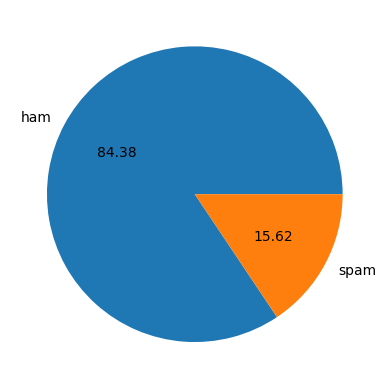

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Data is imbalanced

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/veerabhadra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5742.000000,5742.000000,5742.000000
mean,82.740857,19.117903,2.017764
std,59.203296,13.453470,1.487461
min,2.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,65.000000,16.000000,2.000000
75%,126.000000,27.000000,3.000000
max,910.000000,220.000000,38.000000


In [31]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4845.000000,4845.000000,4845.000000
mean,72.232817,17.492054,1.830753
std,57.330876,13.749521,1.402429
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,94.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,897.000000,897.000000,897.000000
mean,139.498328,27.899666,3.027871
std,29.436528,6.794083,1.527392
min,3.000000,1.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,150.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,225.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

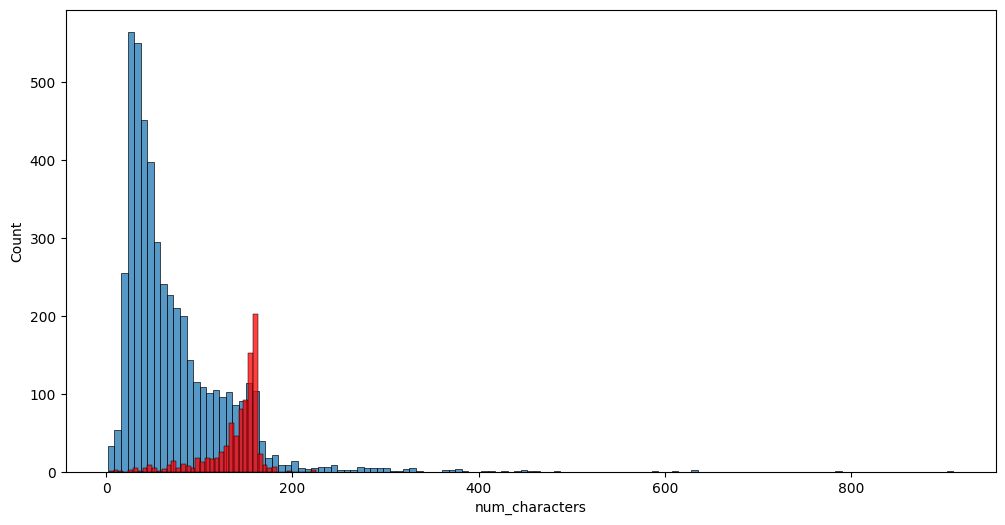

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

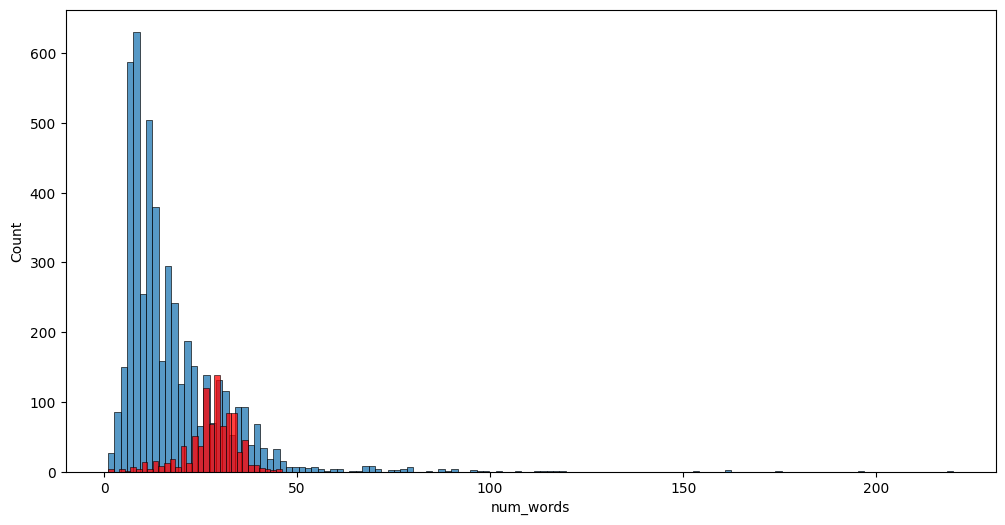

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

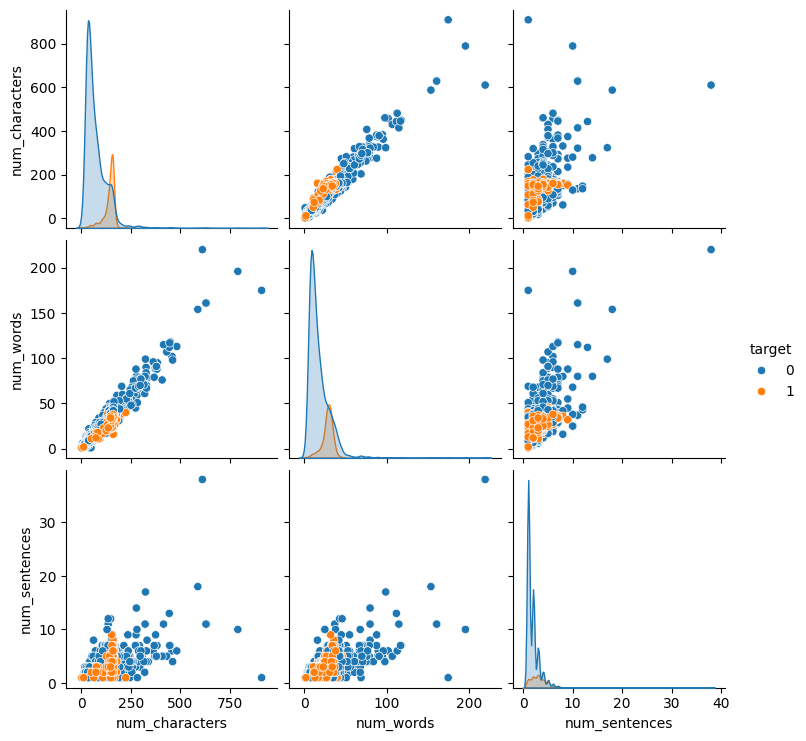

In [36]:
sns.pairplot(df,hue='target')

<Axes: >

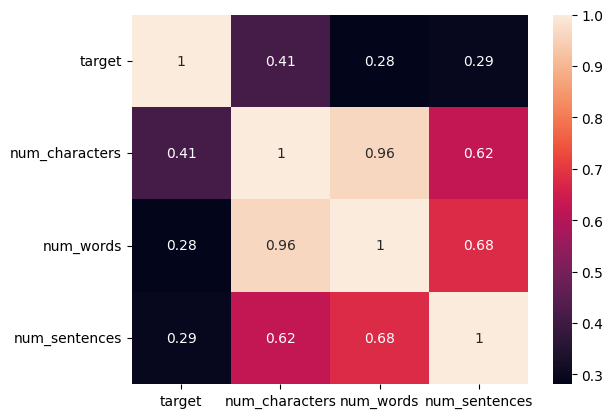

In [37]:
x=df.drop(columns=['text'])
sns.heatmap(x.corr(),annot=True)


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [38]:
from nltk.corpus import stopwords
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

### For Downloading nltk stopwords

In [40]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/veerabhadra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, ok? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight ok cri enough today'

In [42]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

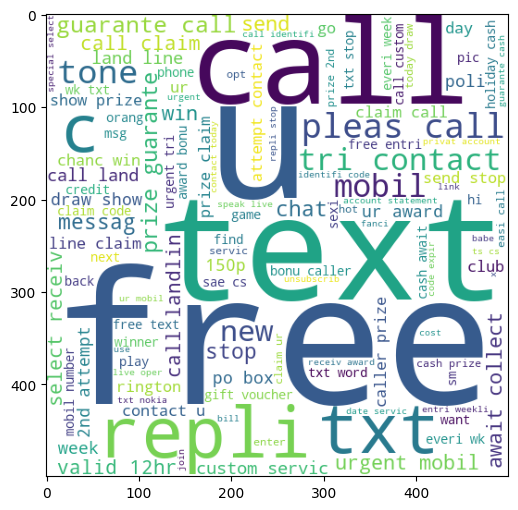

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

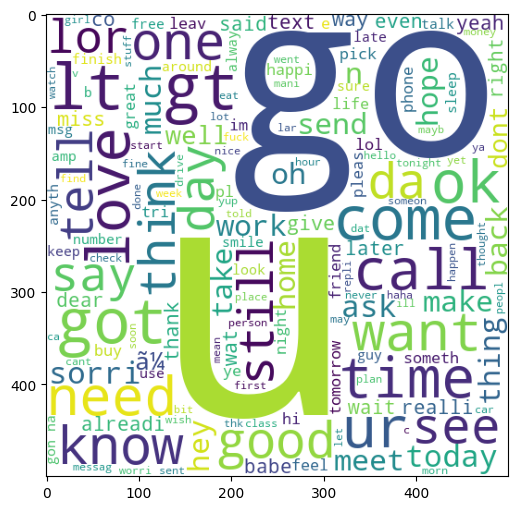

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [52]:
len(spam_corpus)

13623

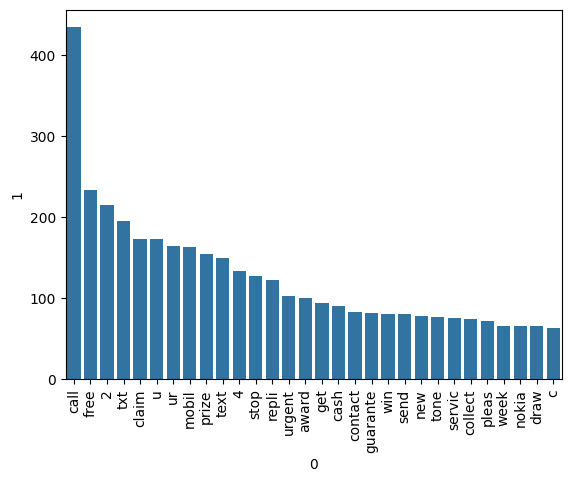

In [53]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

39013

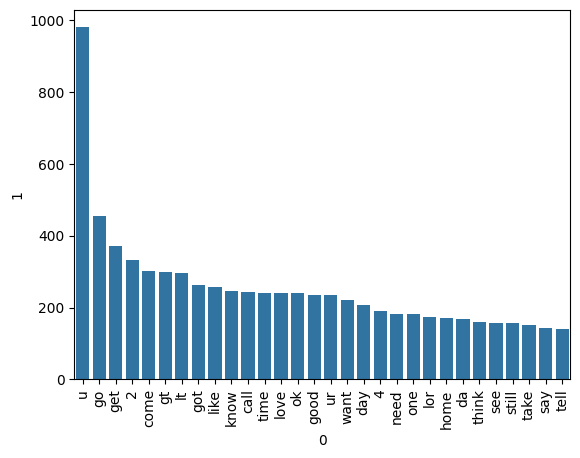

In [56]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

TF_IDF Vectorizaton

In [58]:
from model import TFIDFVectorizer

In [59]:
tfidf_vectorizer = TFIDFVectorizer(max_features=10000)

In [60]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=3000)
tfidf_matrix = tfidf_vectorizer.fit(df['transformed_text'])
X = tfidf_vectorizer.transform(df['transformed_text'])
X = selector.fit_transform(X, df['target'])

In [61]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [62]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [63]:
X.shape

(5742, 3000)

In [64]:
y = df['target'].values

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [67]:

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

Multinomial Naive Bayes From Scratch

In [68]:
from model import MultinomialNB1

In [69]:
mnb = MultinomialNB1()

In [70]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print("MNB Acuuracy:",accuracy_score(y_test, y_pred))
print("Confusion Matrix of MNB:\n",confusion_matrix(y_test,y_pred))
print("MNB Precision:",precision_score(y_test,y_pred))
print("MNB Recall:",recall_score(y_test,y_pred))

MNB Acuuracy: 0.9773716275021758
Confusion Matrix of MNB:
 [[945  20]
 [  6 178]]
MNB Precision: 0.898989898989899
MNB Recall: 0.967391304347826


Multinomial Naive Bayes from libary

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [72]:
mnb1 =MultinomialNB()
mnb1.fit(X_train, y_train)
y_pred1 = mnb1.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9773716275021758
[[945  20]
 [  6 178]]
0.898989898989899


In [73]:
# tfidf --> MNB

KNN Algorithm from Scratch

In [74]:
from model import KNN
knn = KNN(k=3)

In [75]:
knn.fit(X_train, y_train)
# Predict on the testing set
y_pred2 = knn.predict(X_test)
print("Accuracy of KNN:",accuracy_score(y_test, y_pred2))
print("Confusion Matrix of KNN:\n",confusion_matrix(y_test,y_pred2))
print("Precision of KNN:",precision_score(y_test,y_pred2))
print("Recall of KNN:",recall_score(y_test,y_pred2))

Accuracy of KNN: 0.906875543951262
Confusion Matrix of KNN:
 [[965   0]
 [107  77]]
Precision of KNN: 1.0
Recall of KNN: 0.41847826086956524


Logistic Regression Algorithm from Scratch

In [76]:
from model import LogisticRegression1

In [77]:
lrt = LogisticRegression1()
lrt.fit(X_train, y_train)

# Predict on the testing set
y_pred3 = (lrt.predict(X_test)> 0.5).astype(int)
print("Accuracy of LR",accuracy_score(y_test, y_pred3))
print("Confusion Matrix of LR:\n",confusion_matrix(y_test,y_pred3))
print("Precision of LR",precision_score(y_test,y_pred3))
print("Recall of LR:",recall_score(y_test,y_pred3))

/Users/veerabhadra/Documents/Bsc.CSIT/final-year-project/Codes/model.py:119: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy of LR 0.9860748476936466
Confusion Matrix of LR:
 [[958   7]
 [  9 175]]
Precision of LR 0.9615384615384616
Recall of LR: 0.9510869565217391


Logistic Regression from Libary

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lrt1 = LogisticRegression(solver='liblinear', penalty='l1')
lrt1.fit(X_train, y_train)

# Predict on the testing set
y_pred31 = lrt1.predict(X_test)
print(accuracy_score(y_test, y_pred31))
print(confusion_matrix(y_test,y_pred31))
print(precision_score(y_test,y_pred31))

0.9825935596170583
[[959   6]
 [ 14 170]]
0.9659090909090909


DecisionTree Algorithm From scratch

In [80]:
from model import DecisionTree

In [81]:
dt1 = DecisionTree(max_depth=5)
dt1.fit(X_train, y_train)

# Predict on the testing set
y_pred4 = dt1.predict(X_test)
print("Accuracy of DT:",accuracy_score(y_test, y_pred4))
print("Confusion Matrix of DT:\n",confusion_matrix(y_test,y_pred4))
print("Precision of DT:",precision_score(y_test,y_pred4))
print("Recall of DT:",recall_score(y_test,y_pred4))

Accuracy of DT: 0.9234116623150566
Confusion Matrix of DT:
 [[957   8]
 [ 80 104]]
Precision of DT: 0.9285714285714286
Recall of DT: 0.5652173913043478


SVM algorithm from libary

In [82]:

from sklearn.svm import SVC

Accuracy of SVM: 0.8833768494342907
Confusion Matrix of SVM:
 [[897  68]
 [ 66 118]]
Precision of SVM: 0.6344086021505376
Recall of SVM: 0.6413043478260869
Accuracy of SVM: 0.8761158284345744
Confusion Matrix of SVM:
 [[3600  280]
 [ 289  424]]
Precision of SVM: 0.6022727272727273
Recall of SVM: 0.5946704067321178


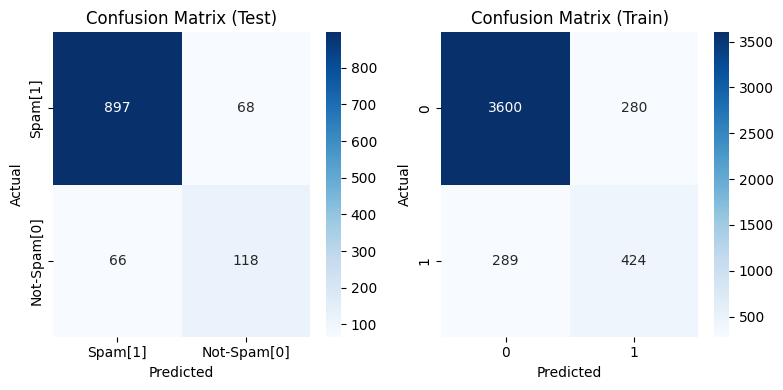

In [83]:
svm = SVC(kernel='sigmoid', gamma=1.0)
svm.fit(X_train, y_train)

# Predict on the testing set
y_pred5 = svm.predict(X_test)

print("Accuracy of SVM:",accuracy_score(y_test, y_pred5))
print("Confusion Matrix of SVM:\n",confusion_matrix(y_test,y_pred5))
print("Precision of SVM:",precision_score(y_test,y_pred5))
print("Recall of SVM:",recall_score(y_test,y_pred5))

y_pred7 = svm.predict(X_train)
print("Accuracy of SVM:",accuracy_score(y_train, y_pred7))
print("Confusion Matrix of SVM:\n",confusion_matrix(y_train,y_pred7))
print("Precision of SVM:",precision_score(y_train,y_pred7))
print("Recall of SVM:",recall_score(y_train,y_pred7))
cm_test = confusion_matrix(y_test,y_pred5)
cm_train = confusion_matrix(y_train,y_pred7)
fig, axs = plt.subplots(1, 2, figsize=(8,4))

# Plot confusion matrix for test data
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=axs[0], xticklabels=['Spam[1]', 'Not-Spam[0]'], yticklabels=['Spam[1]', 'Not-Spam[0]'])
axs[0].set_title("Confusion Matrix (Test)")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

# Plot confusion matrix for train data
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", ax=axs[1])
axs[1].set_title("Confusion Matrix (Train)")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

All from Scratch

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
Z = tfidf.fit_transform(df['transformed_text']).toarray()
Z.shape
Z_train,Z_test,y_train,y_test = train_test_split(Z,y,test_size=0.2,random_state=2)


0.9817232375979112
[[965   0]
 [ 21 163]]
1.0
0.9808404093185282
[[3876    4]
 [  84  629]]
0.9936808846761453


<Figure size 1000x600 with 0 Axes>

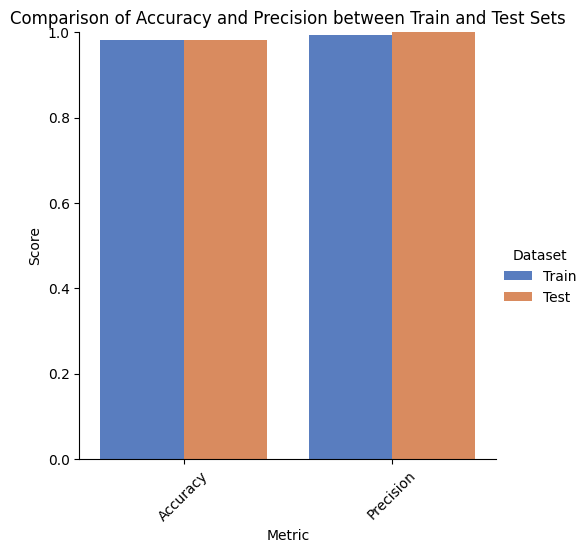

In [85]:
from sklearn.naive_bayes import MultinomialNB
mnb2 =MultinomialNB()
mnb2.fit(Z_train, y_train)
y_pred1 = mnb2.predict(Z_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

y_pred_mnb = mnb2.predict(Z_train)
print(accuracy_score(y_train, y_pred_mnb))
print(confusion_matrix(y_train,y_pred_mnb))
print(precision_score(y_train,y_pred_mnb))

# Calculate accuracy and precision scores for train and test cases
accuracy_train = accuracy_score(y_train, y_pred_mnb)
accuracy_test = accuracy_score(y_test, y_pred1)
precision_train = precision_score(y_train, y_pred_mnb)
precision_test = precision_score(y_test, y_pred1)

# Create a DataFrame to store the results
data = {
    'Metric': ['Accuracy', 'Precision'],
    'Train': [accuracy_train, precision_train],
    'Test': [accuracy_test, precision_test]
}
df = pd.DataFrame(data)

# Melt the DataFrame to have a variable column
df_melted = df.melt(id_vars=['Metric'], var_name='Dataset', value_name='Score')

# Plot the comparison using a catplot
plt.figure(figsize=(10, 6))
sns.catplot(data=df_melted, x="Metric", y="Score", hue="Dataset", kind="bar", palette="muted")
plt.title("Comparison of Accuracy and Precision between Train and Test Sets")
plt.ylim(0, 1)  # Set the y-axis limit to 0 to 1
plt.xticks(rotation=45)
plt.show()



0.9651871192341166
[[962   3]
 [ 37 147]]
0.98
0.9712606139777923
[[3872    8]
 [ 124  589]]
0.9865996649916248


<Figure size 1000x600 with 0 Axes>

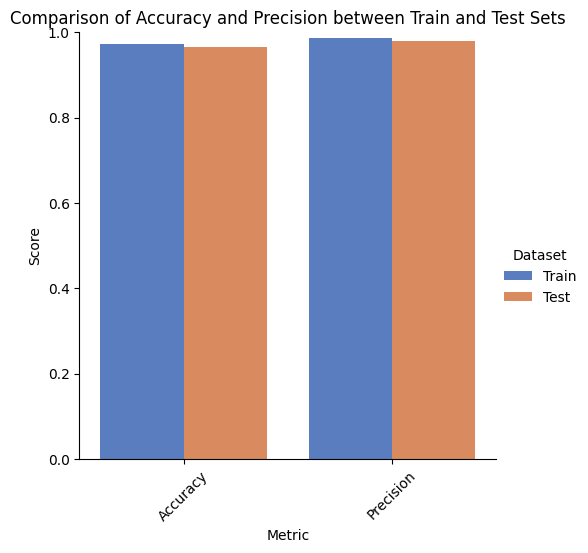

In [86]:
from sklearn.linear_model import LogisticRegression
lrt2=LogisticRegression()
lrt2.fit(Z_train, y_train)

# Predict on the testing set
y_pred31 = lrt2.predict(Z_test)
print(accuracy_score(y_test, y_pred31))
print(confusion_matrix(y_test,y_pred31))
print(precision_score(y_test,y_pred31))

y_pred_lrt = lrt2.predict(Z_train)
print(accuracy_score(y_train, y_pred_lrt))
print(confusion_matrix(y_train,y_pred_lrt))
print(precision_score(y_train,y_pred_lrt))

# Calculate accuracy and precision scores for train and test cases
accuracy_train = accuracy_score(y_train, y_pred_lrt)
accuracy_test = accuracy_score(y_test, y_pred31)
precision_train = precision_score(y_train, y_pred_lrt)
precision_test = precision_score(y_test, y_pred31)

# Create a DataFrame to store the results
data = {
    'Metric': ['Accuracy', 'Precision'],
    'Train': [accuracy_train, precision_train],
    'Test': [accuracy_test, precision_test]
}
df = pd.DataFrame(data)

# Melt the DataFrame to have a variable column
df_melted = df.melt(id_vars=['Metric'], var_name='Dataset', value_name='Score')

# Plot the comparison using a catplot
plt.figure(figsize=(10, 6))
sns.catplot(data=df_melted, x="Metric", y="Score", hue="Dataset", kind="bar", palette="muted")
plt.title("Comparison of Accuracy and Precision between Train and Test Sets")
plt.ylim(0, 1)  # Set the y-axis limit to 0 to 1
plt.xticks(rotation=45)
plt.show()

In [87]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [88]:
svc2 = LinearSVC()
knc2 = KNeighborsClassifier()
dtc2 = DecisionTreeClassifier()

/Users/veerabhadra/Documents/Bsc.CSIT/final-year-project/Codes/spam/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.9852045256744996
[[959   6]
 [ 11 173]]
0.9664804469273743
0.9971696059220553
[[3877    3]
 [  10  703]]
0.9957507082152974


<Figure size 1000x600 with 0 Axes>

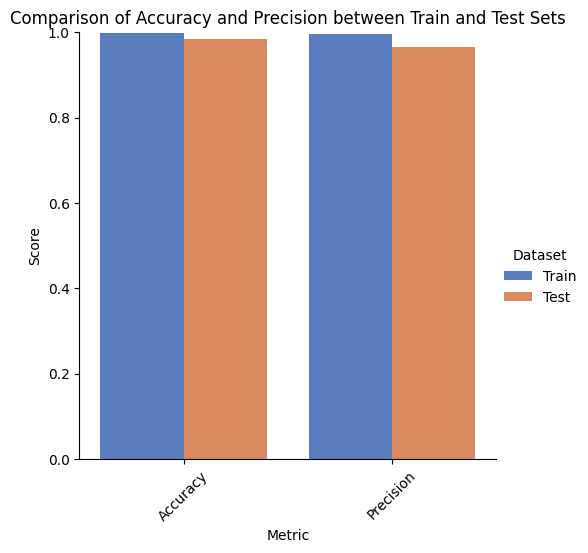

In [89]:

svc2.fit(Z_train, y_train)

# Predict on the testing set
y_pred10 = svc2.predict(Z_test)
print(accuracy_score(y_test, y_pred10))
print(confusion_matrix(y_test,y_pred10))
print(precision_score(y_test,y_pred10))

y_pred_svc = svc2.predict(Z_train)
print(accuracy_score(y_train, y_pred_svc))
print(confusion_matrix(y_train,y_pred_svc))
print(precision_score(y_train,y_pred_svc))

# Calculate accuracy and precision scores for train and test cases
accuracy_train = accuracy_score(y_train, y_pred_svc)
accuracy_test = accuracy_score(y_test, y_pred10)
precision_train = precision_score(y_train, y_pred_svc)
precision_test = precision_score(y_test, y_pred10)

# Create a DataFrame to store the results
data = {
    'Metric': ['Accuracy', 'Precision'],
    'Train': [accuracy_train, precision_train],
    'Test': [accuracy_test, precision_test]
}
df = pd.DataFrame(data)

# Melt the DataFrame to have a variable column
df_melted = df.melt(id_vars=['Metric'], var_name='Dataset', value_name='Score')

# Plot the comparison using a catplot
plt.figure(figsize=(10, 6))
sns.catplot(data=df_melted, x="Metric", y="Score", hue="Dataset", kind="bar", palette="muted")
plt.title("Comparison of Accuracy and Precision between Train and Test Sets")
plt.ylim(0, 1)  # Set the y-axis limit to 0 to 1
plt.xticks(rotation=45)
plt.show()



0.9025239338555265
[[965   0]
 [112  72]]
1.0
0.9279338123231003
[[3880    0]
 [ 331  382]]
1.0


<Figure size 1200x800 with 0 Axes>

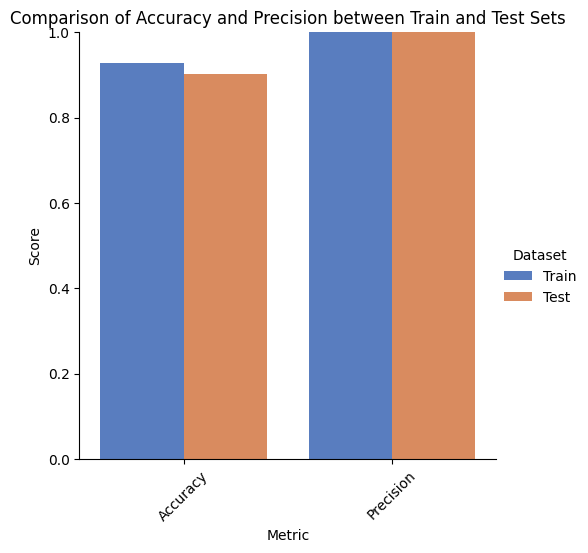

In [90]:

knc2.fit(Z_train, y_train)

# Predict on the testing set
y_pred11 = knc2.predict(Z_test)
print(accuracy_score(y_test, y_pred11))
print(confusion_matrix(y_test,y_pred11))
print(precision_score(y_test,y_pred11))

y_pred_knc = knc2.predict(Z_train)
print(accuracy_score(y_train , y_pred_knc))
print(confusion_matrix(y_train,y_pred_knc))
print(precision_score(y_train,y_pred_knc))

# Calculate accuracy and precision scores for train and test cases
accuracy_train = accuracy_score(y_train, y_pred_knc)
accuracy_test = accuracy_score(y_test, y_pred11)
precision_train = precision_score(y_train, y_pred_knc)
precision_test = precision_score(y_test, y_pred11)

# Create a DataFrame to store the results
data = {
    'Metric': ['Accuracy', 'Precision'],
    'Train': [accuracy_train, precision_train],
    'Test': [accuracy_test, precision_test]
}
df = pd.DataFrame(data)

# Melt the DataFrame to have a variable column
df_melted = df.melt(id_vars=['Metric'], var_name='Dataset', value_name='Score')

# Plot the comparison using a catplot
plt.figure(figsize=(12, 8))
sns.catplot(data=df_melted, x="Metric", y="Score", hue="Dataset", kind="bar", palette="muted")
plt.title("Comparison of Accuracy and Precision between Train and Test Sets")
plt.ylim(0, 1)  # Set the y-axis limit to 0 to 1
plt.xticks(rotation=45)
plt.show()

0.95822454308094
[[938  27]
 [ 21 163]]
0.8578947368421053
0.999346832135859
[[3880    0]
 [   3  710]]
1.0


<Figure size 1000x600 with 0 Axes>

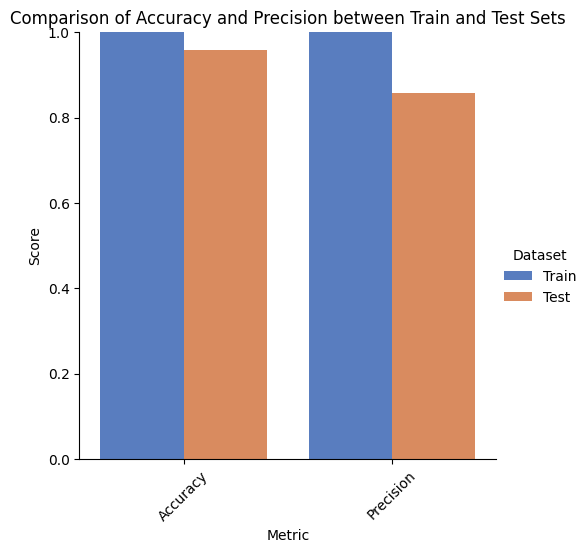

In [91]:

dtc2.fit(Z_train, y_train)

# Predict on the testing set
y_pred12 = dtc2.predict(Z_test)
print(accuracy_score(y_test, y_pred12))
print(confusion_matrix(y_test,y_pred12))
print(precision_score(y_test,y_pred12))

y_pred_dtc = dtc2.predict(Z_train)
print(accuracy_score(y_train, y_pred_dtc))
print(confusion_matrix(y_train,y_pred_dtc))
print(precision_score(y_train,y_pred_dtc))

# Calculate accuracy and precision scores for train and test cases
accuracy_train = accuracy_score(y_train, y_pred_dtc)
accuracy_test = accuracy_score(y_test, y_pred12)
precision_train = precision_score(y_train, y_pred_dtc)
precision_test = precision_score(y_test, y_pred12)

# Create a DataFrame to store the results
data = {
    'Metric': ['Accuracy', 'Precision'],
    'Train': [accuracy_train, precision_train],
    'Test': [accuracy_test, precision_test]
}
df = pd.DataFrame(data)

# Melt the DataFrame to have a variable column
df_melted = df.melt(id_vars=['Metric'], var_name='Dataset', value_name='Score')

# Plot the comparison using a catplot
plt.figure(figsize=(10, 6))
sns.catplot(data=df_melted, x="Metric", y="Score", hue="Dataset", kind="bar", palette="muted")
plt.title("Comparison of Accuracy and Precision between Train and Test Sets")
plt.ylim(0, 1)  # Set the y-axis limit to 0 to 1
plt.xticks(rotation=45)
plt.show()

##Comparison

Make a List of Algorithms 

In [92]:
clfs = {
    'SVC' : svc2,
    'KN' : knc2, 
    'NB': mnb2, 
    'DT': dtc2, 
    'LR': lrt2, 
    
}

In [93]:
def test_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [94]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_train)
    accuracy = accuracy_score(y_train,y_pred)
    precision = precision_score(y_train,y_pred)
    
    return accuracy,precision

/Users/veerabhadra/Documents/Bsc.CSIT/final-year-project/Codes/spam/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/veerabhadra/Documents/Bsc.CSIT/final-year-project/Codes/spam/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/veerabhadra/Documents/Bsc.CSIT/final-year-project/Codes/spam/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/veerabhadra/Documents/Bsc.CSIT/final-year-project/Codes/spam/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of

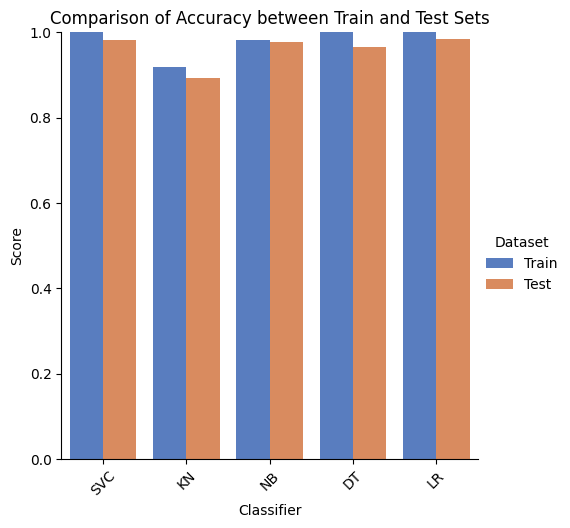

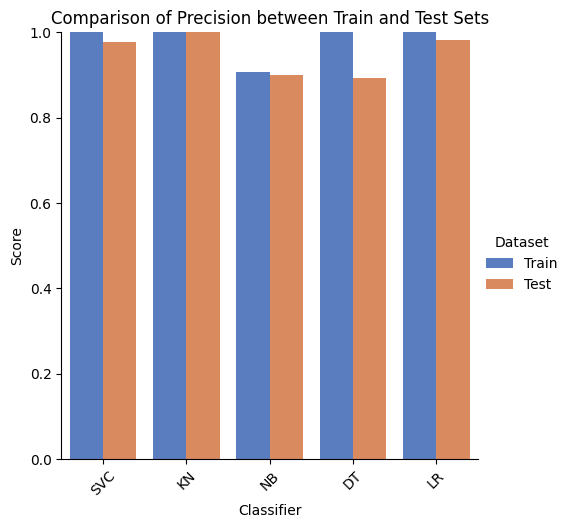

In [95]:

# Create lists to store the results
train_results = []
test_results = []

# Iterate over each classifier
for clf_name, clf in clfs.items():
    # Train the classifier and get train results
    train_accuracy, train_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    train_results.append({'Classifier': clf_name, 'Metric': 'Accuracy', 'Score': train_accuracy, 'Dataset': 'Train'})
    train_results.append({'Classifier': clf_name, 'Metric': 'Precision', 'Score': train_precision, 'Dataset': 'Train'})
    
    # Test the classifier and get test results
    test_accuracy, test_precision = test_classifier(clf, X_train, y_train, X_test, y_test)
    test_results.append({'Classifier': clf_name, 'Metric': 'Accuracy', 'Score': test_accuracy, 'Dataset': 'Test'})
    test_results.append({'Classifier': clf_name, 'Metric': 'Precision', 'Score': test_precision, 'Dataset': 'Test'})

# Combine train and test results into DataFrames
train_df = pd.DataFrame(train_results)
test_df = pd.DataFrame(test_results)

# Concatenate train and test DataFrames
df_concat = pd.concat([train_df, test_df])




sns.catplot(data=df_concat[df_concat['Metric'] == 'Accuracy'], x="Classifier", y="Score", hue="Dataset", kind="bar", palette="muted")
plt.title("Comparison of Accuracy between Train and Test Sets")
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for precision

sns.catplot(data= df_concat[df_concat['Metric'] == 'Precision'], x="Classifier", y="Score", hue="Dataset", kind="bar", palette="muted")
plt.title("Comparison of Precision between Train and Test Sets")
plt.ylim(0, 1)
plt.xticks(rotation=45)


plt.show()

In [96]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/Users/veerabhadra/Documents/Bsc.CSIT/final-year-project/Codes/spam/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/veerabhadra/Documents/Bsc.CSIT/final-year-project/Codes/spam/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For  SVC
Accuracy -  1.0
Precision -  1.0
For  KN
Accuracy -  0.9181362943609841
Precision -  1.0
For  NB
Accuracy -  0.9830176355323318
Precision -  0.9065300896286812
For  DT
Accuracy -  1.0
Precision -  1.0
For  LR
Accuracy -  1.0
Precision -  1.0


In [97]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [98]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,1.000000,1.00000
3,DT,1.000000,1.00000
4,LR,1.000000,1.00000
2,NB,0.983018,0.90653
1,KN,0.918136,1.00000


In [99]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,1.000000
1,DT,Accuracy,1.000000
2,LR,Accuracy,1.000000
3,NB,Accuracy,0.983018
4,KN,Accuracy,0.918136
5,SVC,Precision,1.000000
6,DT,Precision,1.000000
7,LR,Precision,1.000000
8,NB,Precision,0.906530
9,KN,Precision,1.000000


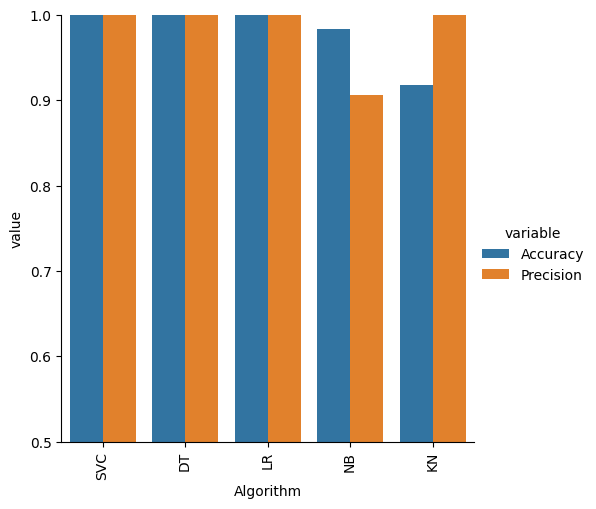

In [100]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [101]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb2,open('NBmodel.pkl','wb'))
pickle.dump(lrt2,open('LRmodel.pkl','wb'))
pickle.dump(knc2,open('KNNmodel.pkl','wb'))
pickle.dump(dtc2,open('DTmodel.pkl','wb'))
pickle.dump(svc2,open('SvMmode.pkl','wb'))


In [102]:
input_sms=transform_text("Congratulations ur awarded 500 of CD vouchers or 125 gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16")
print(input_sms)
vector_input = tfidf.transform([input_sms])

congratul ur award 500 cd voucher 125 gift guarante free entri 2 100 wkli draw txt music 87066 tnc


In [103]:
result = mnb2.predict(vector_input)[0]
if result == 1:
    print(" NB Algorithm: Spam Message")
else:
    print(" NB Algorithm: Not-Spam Message")
result = lrt2.predict(vector_input)[0]
if result == 1:
    print(" LR Algorithm: Spam Message")
else:
    print(" LR Algorithm: Not-Spam Message")
    result = knc2.predict(vector_input)[0]
if result == 1:
    print(" KNN Algorithm: Spam Message")
else:
    print(" KNN Algorithm: Not-Spam Message")
result = dtc2.predict(vector_input)[0]
if result == 1:
    print(" DecisionTree Algorithm: Spam Message")
else:
    print(" DT Algorithm: Not-Spam Message")
result = svc2.predict(vector_input)[0]
if result == 1:
    print(" svc Algorithm: Spam Message")
else:
    print(" svc Algorithm: Not-Spam Message")

 NB Algorithm: Spam Message
 LR Algorithm: Not-Spam Message
 KNN Algorithm: Not-Spam Message
 DT Algorithm: Not-Spam Message
 svc Algorithm: Not-Spam Message
